In [1]:
import pandas as pd

In [2]:
def preprocess_df(df_path):

    df = pd.read_csv(df_path)
    df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
    df.to_csv("dataset/Student_Performance_preprocess.csv", index = False)

preprocess_df(df_path="dataset/Student_Performance.csv")

In [3]:
df = pd.read_csv('dataset/Student_Performance_preprocess.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [5]:
vas = df.columns.to_list()

In [6]:
print(vas[:-1])
print(vas[-1])

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Performance Index


In [7]:
import pandas as pd
import numpy as np

def load_data(csv_file):
    # Step 1: Load the CSV file using pandas
    data = pd.read_csv(csv_file)
    data_col_list = data.columns.to_list()
    x_col_list = data_col_list[:-1]
    print(f"Independent Values;\n{x_col_list}")

    y_col = data_col_list[-1]
    # Step 2: Extract the independent variables (features) into matrix X
    # Assuming that the independent variables are in columns 'X1', 'X2', ..., 'Xn'
    # X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
    X = data[x_col_list].values

    # Step 3: Extract the dependent variable into vector Y
    # Assuming that the dependent variable is in a column named 'Y'
    Y = data[y_col].values
    print(f"dependent Values;\n{y_col}")
    return X, Y

# Usage:
csv_file = 'dataset/Student_Performance_preprocess.csv'  # Replace with the path to your CSV file
X, Y = load_data(csv_file)


Independent Values;
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
dependent Values;
Performance Index


In [8]:
print(X)
print(type(X))
print("----")
print(Y)
print(type(Y))

[[ 7 99  1  9  1]
 [ 4 82  0  4  2]
 [ 8 51  1  7  2]
 ...
 [ 6 83  1  8  5]
 [ 9 97  1  7  0]
 [ 7 74  0  8  1]]
<class 'numpy.ndarray'>
----
[91. 65. 45. ... 74. 95. 64.]
<class 'numpy.ndarray'>


In [9]:
from sklearn.model_selection import train_test_split

def split_data(X, Y, test_size=0.3, random_state=None):
    """
    Split the data into training and test sets.

    Args:
    X (numpy.ndarray): The independent variables (features).
    Y (numpy.ndarray): The dependent variable.
    test_size (float): The proportion of data to include in the test split (default is 0.3).
    random_state (int or None): Seed for random number generation (optional).

    Returns:
    X_train (numpy.ndarray): Training data for independent variables.
    X_test (numpy.ndarray): Test data for independent variables.
    Y_train (numpy.ndarray): Training data for the dependent variable.
    Y_test (numpy.ndarray): Test data for the dependent variable.
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

# Usage:
X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.3, random_state=42)


In [10]:
print(X_test)
print(f'lenght of array {len(X_test)}')
print(type(X_test))
print("----")

print(X_train)
print(f'lenght of array {len(X_train)}')
print(type(X_train))
print("----")

print(Y_test)
print(f'lenght of array {len(Y_test)}')
print(type(Y_test))
print("----")

print(Y_train)
print(f'lenght of array {len(Y_train)}')
print(type(Y_train))
print("----")

[[ 5 69  0  8  2]
 [ 2 46  1  4  8]
 [ 7 56  1  7  5]
 ...
 [ 5 48  1  6  4]
 [ 3 86  1  9  5]
 [ 6 43  1  6  4]]
lenght of array 3000
<class 'numpy.ndarray'>
----
[[ 4 99  1  6  1]
 [ 6 90  1  9  3]
 [ 8 57  0  6  1]
 ...
 [ 9 48  0  7  6]
 [ 1 47  0  9  0]
 [ 2 46  0  6  6]]
lenght of array 7000
<class 'numpy.ndarray'>
----
[51. 20. 46. ... 33. 69. 29.]
lenght of array 3000
<class 'numpy.ndarray'>
----
[82. 79. 50. ... 44. 20. 24.]
lenght of array 7000
<class 'numpy.ndarray'>
----


In [11]:
def Cost_function(X, Y, weights, bias):
    """
    Compute the mean squared error (MSE) cost for a given hypothesis (model).

    Args:
    X (numpy.ndarray): Training data for independent variables.
    Y (numpy.ndarray): Actual values (dependent variable).
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    cost (float): Mean squared error cost.
    """
    # Compute the predicted values using the hypothesis function
    predicted_values = H_function(X, weights, bias)
    
    # Calculate the squared differences between predicted and actual values
    squared_errors = (predicted_values - Y) ** 2
    
    # Calculate the mean squared error
    cost = np.mean(squared_errors)
    
    return cost

# Usage:
# Assuming you have already trained your linear regression model and obtained the weights and bias.
# cost_train = Cost_function(X_train, Y_train, weights, bias)


In [15]:
def H_function(X, weights, bias):
    """
    Compute the estimated prices for all examples in the training set.

    Args:
    X (numpy.ndarray): Training data for independent variables.
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    estimated_prices (numpy.ndarray): Estimated prices for all examples in the training set.
    """
    estimated_prices = np.dot(X, weights) + bias
    return estimated_prices

# Usage:
# Assuming you have already trained your linear regression model and obtained the weights and bias.
# estimated_prices_train = H_function(X_train, updated_weights, updated_bias)


In [32]:
def Gradient_descent(X_train, Y_train, X_test, Y_test, weights, bias, learning_rate, num_epochs):
    """
    Perform gradient descent to update the model parameters (weights and bias).

    Args:
    X (numpy.ndarray): Training data for independent variables.
    Y (numpy.ndarray): Actual values (dependent variable).
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.
    learning_rate (float): Learning rate for gradient descent.
    num_epochs (int): Number of epochs for training.

    Returns:
    weights (numpy.ndarray): Updated model coefficients (weights).
    bias (float): Updated model bias term.
    cost_history (list): List of cost values for each epoch.
    """
    train_cost_history = []
    test_cost_history = []


    # Optional: Normalize the data
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    X_normalized = (X_train - X_mean) / X_std

    for epoch in range(num_epochs):
        # Compute the predicted values using the current model
        predicted_values = H_function(X_normalized, weights, bias)
        
        # Compute the gradients of the weights and bias
        gradient_weights = (1 / len(Y_train)) * np.dot(X_normalized.T, (predicted_values - Y_train))
        gradient_bias = (1 / len(Y_train)) * np.sum(predicted_values - Y_train)
        
        # Update the weights and bias using the gradients and learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        # Calculate the cost and append it to the cost history
        train_cost = Cost_function(X_normalized, Y_train, weights, bias)
        # cost_history.append(cost)
        train_cost_history.append(train_cost)
        
        test_cost = Cost_function(X_test, Y_test, weights, bias)
        test_cost_history.append(test_cost)
        
        # Print the cost for every 100 epochs (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train_Cost = {train_cost}  //  Test_Cost = {test_cost}")

    return weights, bias, train_cost_history, test_cost_history

# Usage:
# Define your learning rate and number of epochs
learning_rate = 0.00001  # Adjust as needed
num_epochs = 6000

# Initialize your weights and bias (you can use random values or zeros)
initial_weights = np.random.rand(X_train.shape[1])
initial_bias = 0.05

# Perform gradient descent
updated_weights, updated_bias, train_cost_history, test_cost_history = Gradient_descent(X_train, Y_train, X_test, Y_test, initial_weights, initial_bias, learning_rate, num_epochs)


Epoch 0: Train_Cost = 3399.6320960471517  //  Test_Cost = 180.83346000725092
Epoch 100: Train_Cost = 3392.8525883512116  //  Test_Cost = 207.01675792897746
Epoch 200: Train_Cost = 3386.0866174866055  //  Test_Cost = 236.447737625976
Epoch 300: Train_Cost = 3379.334156422963  //  Test_Cost = 269.11663812487006
Epoch 400: Train_Cost = 3372.595178183886  //  Test_Cost = 305.01372118539314
Epoch 500: Train_Cost = 3365.869655846847  //  Test_Cost = 344.1292712517971
Epoch 600: Train_Cost = 3359.1575625430783  //  Test_Cost = 386.45359540437335
Epoch 700: Train_Cost = 3352.458871457466  //  Test_Cost = 431.97702331107143
Epoch 800: Train_Cost = 3345.7735558284435  //  Test_Cost = 480.6899071792123
Epoch 900: Train_Cost = 3339.1015889478836  //  Test_Cost = 532.5826217072976
Epoch 1000: Train_Cost = 3332.44294416099  //  Test_Cost = 587.6455640369398
Epoch 1100: Train_Cost = 3325.797594866194  //  Test_Cost = 645.8691537048553
Epoch 1200: Train_Cost = 3319.165514515047  //  Test_Cost = 707.24

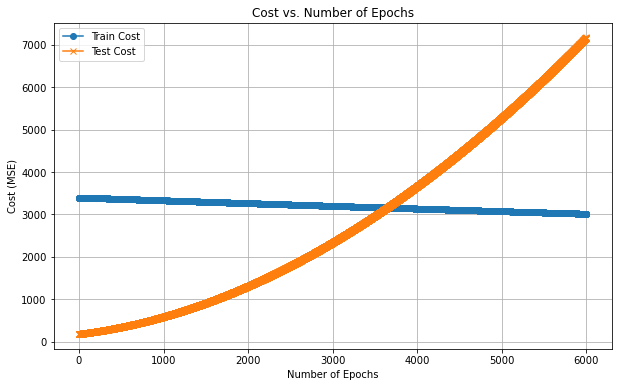

In [33]:
import matplotlib.pyplot as plt

def Plot_data(train_costs, test_costs):
    """
    Plot the cost (MSE) for both the train and test sets after each epoch.

    Args:
    train_costs (list): List of training cost values for each epoch.
    test_costs (list): List of test cost values for each epoch.
    """
    epochs = range(1, len(train_costs) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_costs, label='Train Cost', marker='o', linestyle='-')
    plt.plot(epochs, test_costs, label='Test Cost', marker='x', linestyle='-')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost vs. Number of Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have lists of training and test costs obtained during training
Plot_data(train_cost_history, test_cost_history)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'your_dataset.csv' with your dataset)
# Ensure that your dataset has at least 300 training examples and more than 5 features
data = pd.read_csv('your_dataset.csv')

# Step 2: Preprocess the data if necessary (e.g., handle missing values, feature scaling)

# Step 3: Split the dataset into training and test sets
X = data.drop('dependent_variable', axis=1)  # Assuming 'dependent_variable' is the target variable
Y = data['dependent_variable']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 4: Implement and train the linear regression model with different hyperparameters

def LinearRegression(X_train, Y_train, X_test, Y_test, learning_rate, num_epochs):
    # Initialize model parameters (weights and bias)
    weights = np.random.rand(X_train.shape[1])
    bias = 0.0

    train_costs = []
    test_costs = []

    for epoch in range(num_epochs):
        # Perform gradient descent and update model parameters
        updated_weights, updated_bias, cost_history = Gradient_descent(X_train, Y_train, weights, bias, learning_rate, num_epochs)

        # Calculate cost for training set
        train_cost = Cost_function(X_train, Y_train, updated_weights, updated_bias)
        train_costs.append(train_cost)

        # Calculate cost for test set
        test_cost = Cost_function(X_test, Y_test, updated_weights, updated_bias)
        test_costs.append(test_cost)

    return train_costs, test_costs

# Step 5: Monitor and record the costs for different hyperparameter combinations
learning_rates = [0.01, 0.1, 0.5]  # You can experiment with different learning rates
num_epochs_values = [100, 500, 1000]  # You can experiment with different numbers of epochs

best_learning_rate = None
best_num_epochs = None
best_test_cost = float('inf')

for lr in learning_rates:
    for epochs in num_epochs_values:
        train_costs, test_costs = LinearRegression(X_train, Y_train, X_test, Y_test, lr, epochs)

        # Step 6: Plot the costs for different hyperparameter combinations
        plt.plot(range(1, epochs + 1), train_costs, label=f'Train Cost (lr={lr}, epochs={epochs})')
        plt.plot(range(1, epochs + 1), test_costs, label=f'Test Cost (lr={lr}, epochs={epochs})')

        # Step 7: Find the best hyperparameters based on the lowest test cost
        if test_costs[-1] < best_test_cost:
            best_test_cost = test_costs[-1]
            best_learning_rate = lr
            best_num_epochs = epochs

# Plot settings
plt.xlabel('Number of Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs. Number of Epochs for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

# Step 7 (continued): Report the best values of learning_rate and num_epochs
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Number of Epochs: {best_num_epochs}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'your_dataset.csv' with your dataset)
# Ensure that your dataset has at least 300 training examples and more than 5 features
data = pd.read_csv('your_dataset.csv')

# Step 2: Preprocess the data if necessary (e.g., handle missing values, feature scaling)

# Step 3: Split the dataset into training and test sets
X = data.drop('dependent_variable', axis=1)  # Assuming 'dependent_variable' is the target variable
Y = data['dependent_variable']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 4: Implement the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 5: Update the cost function to use cross-entropy for logistic regression
def Cost_function(X, Y, weights, bias):
    predicted_probabilities = sigmoid(np.dot(X, weights) + bias)
    cost = -np.mean(Y * np.log(predicted_probabilities) + (1 - Y) * np.log(1 - predicted_probabilities))
    return cost

# Step 6: Update the gradient descent function for logistic regression
def Gradient_descent(X, Y, weights, bias, learning_rate, num_epochs):
    cost_history = []

    for epoch in range(num_epochs):
        predicted_probabilities = sigmoid(np.dot(X, weights) + bias)

        # Compute gradients for weights and bias
        gradient_weights = (1 / len(Y)) * np.dot(X.T, (predicted_probabilities - Y))
        gradient_bias = (1 / len(Y)) * np.sum(predicted_probabilities - Y)

        # Update weights and bias using gradients and learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Calculate the cost and append it to the cost history
        cost = Cost_function(X, Y, weights, bias)
        cost_history.append(cost)

        # Print the cost for every 100 epochs (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return weights, bias, cost_history

# Step 7: Monitor and record the costs for different hyperparameter combinations
learning_rates = [0.01, 0.1, 0.5]  # You can experiment with different learning rates
num_epochs_values = [100, 500, 1000]  # You can experiment with different numbers of epochs

best_learning_rate = None
best_num_epochs = None
best_test_cost = float('inf')

for lr in learning_rates:
    for epochs in num_epochs_values:
        # Initialize model parameters (weights and bias)
        weights = np.random.rand(X_train.shape[1])
        bias = 0.0

        # Perform gradient descent and update model parameters
        updated_weights, updated_bias, cost_history = Gradient_descent(X_train, Y_train, weights, bias, lr, epochs)

        # Calculate cost for test set
        test_cost = Cost_function(X_test, Y_test, updated_weights, updated_bias)

        # Step 8: Find the best hyperparameters based on the lowest test cost
        if test_cost < best_test_cost:
            best_test_cost = test_cost
            best_learning_rate = lr
            best_num_epochs = epochs

        # Plot the cost for both train and test sets
        plt.plot(range(1, epochs + 1), cost_history, label=f'Cost (lr={lr}, epochs={epochs})')

# Plot settings
plt.xlabel('Number of Epochs')
plt.ylabel('Cost (Cross-Entropy)')
plt.title('Cost vs. Number of Epochs for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

# Step 8 (continued): Report the best values of learning_rate and num_epochs
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Number of Epochs: {best_num_epochs}")
